In [1]:
import tensorflow
from tensorflow.keras.preprocessing import image
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [2]:
names = ['Bolaji','Damola','Amarachi']

In [3]:
bol_train = []
bol_test = []
dam_test = []
dam_train = []
ama_test = []
ama_train = []

In [4]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
from cv2 import cv2


In [6]:
#!/usr/bin/python3
import os

path =r"C:\Users\USER\Downloads\dl\datasets"

# Now change the directory
os.chdir( path )

# Check current working directory.
retval = os.getcwd()

print ("Directory changed successfully %s" % retval)

Directory changed successfully C:\Users\USER\Downloads\dl\datasets


In [7]:
test_dir = r'C:\Users\USER\Downloads\dl\datasets\Test'
train_dir = r'C:\Users\USER\Downloads\dl\datasets\Train'

In [8]:
#Train_set
os.chdir(train_dir+'\Bolaji')
bol_train.extend(os.listdir())

os.chdir(train_dir+'\Damola')
dam_train.extend(os.listdir())

os.chdir(train_dir+'\Prisca')
ama_train.extend(os.listdir())

In [9]:
#Test_set
os.chdir(test_dir+'\Bolaji')
bol_test.extend(os.listdir())

os.chdir(test_dir+'\Damola')
dam_test.extend(os.listdir())

os.chdir(test_dir+'\Prisca')
ama_test.extend(os.listdir())

In [10]:
X_train=[]
y_train=[]
X_test=[]
y_test=[]

In [11]:
for i in bol_train:
    directory = train_dir + '/Bolaji/' + i
    img = image.load_img(directory,target_size=(224,224),grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    X_train.append(img)
    y_train.append(0)
    
for i in dam_train:
    directory = train_dir + '/Damola/' + i
    img = image.load_img(directory,target_size=(224,224),grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    X_train.append(img)
    y_train.append(1)
    
    
for i in ama_train:
    directory = train_dir + '/Prisca/' + i
    img = image.load_img(directory,target_size=(224,224),grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    X_test.append(img)
    y_test.append(2)
    

In [12]:
for i in bol_test:
    directory = test_dir + '/Bolaji/' + i
    img = image.load_img(directory,target_size=(224,224),grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    X_test.append(img)
    y_test.append(0)
    
for i in dam_test:
    directory = test_dir + '/Damola/' + i
    img = image.load_img(directory,target_size=(224,224),grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    X_test.append(img)
    y_test.append(1)
    
for i in ama_test:
    directory = test_dir + '/Prisca/' + i
    img = image.load_img(directory,target_size=(224,224),grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    X_test.append(img)
    y_test.append(2)

In [13]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [14]:
X_train.shape,X_test.shape

((105, 224, 224, 3), (99, 224, 224, 3))

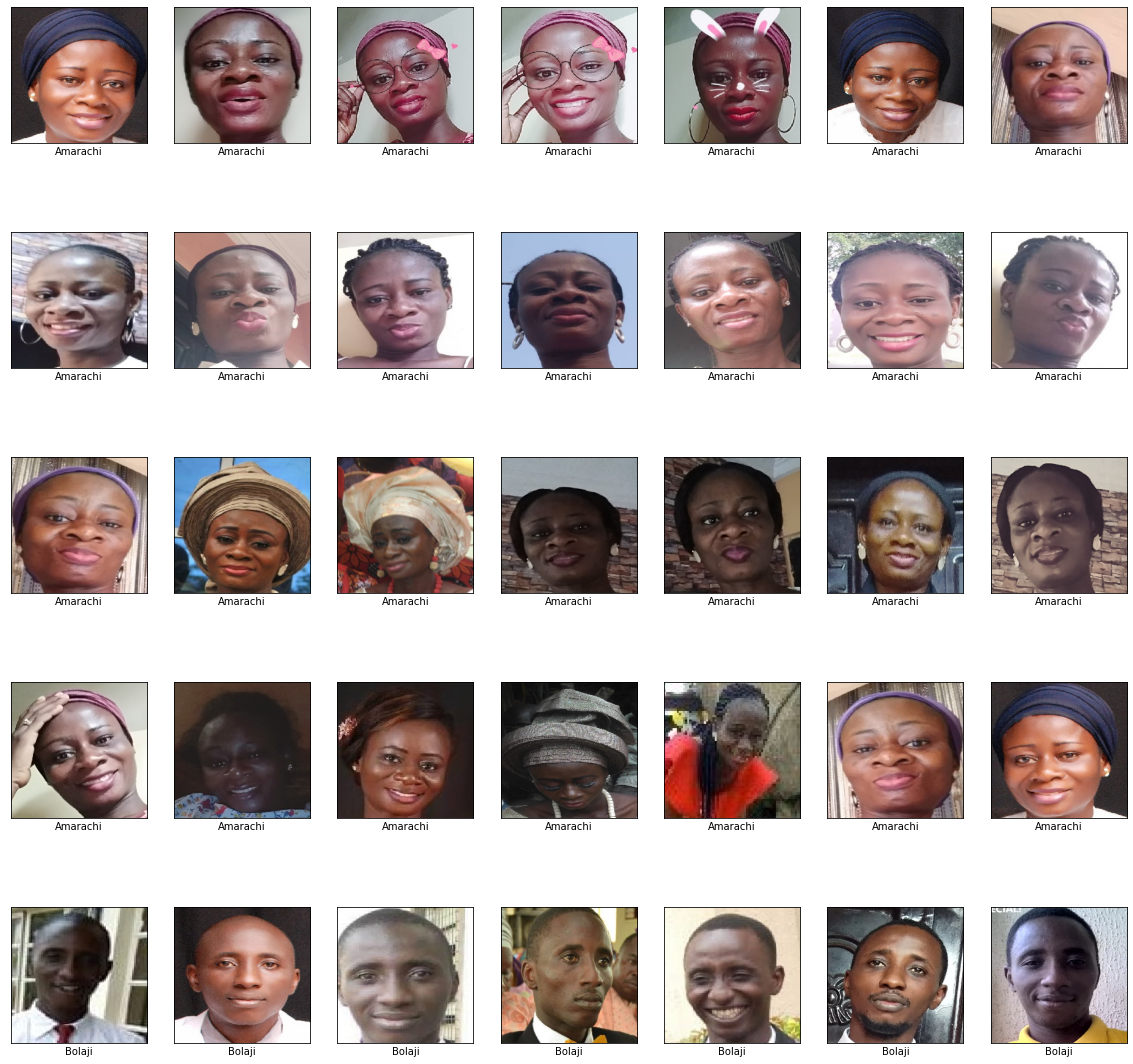

In [15]:
plt.figure(figsize = (20,20))
for i in range(35):
    plt.subplot(5,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i*2],cmap=plt.cm.binary)
    plt.xlabel(names[y_test[i*2]])

In [16]:
from tensorflow.keras import models, layers

In [17]:
from tensorflow.keras.applications import InceptionResNetV2
conv_base = InceptionResNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [29]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(300,activation='relu',bias_regularizer=tensorflow.keras.regularizers.l2(0.001)))
model.add(layers.Dropout(0.25))

model.add(layers.BatchNormalization())
model.add(layers.Dense(200,activation='relu',bias_regularizer=tensorflow.keras.regularizers.l2(0.001)))
model.add(layers.Dropout(0.25))

model.add(layers.BatchNormalization())
model.add(layers.Dense(150,activation='relu',bias_regularizer=tensorflow.keras.regularizers.l2(0.001)))
model.add(layers.Dropout(0.25))

model.add(layers.BatchNormalization())
model.add(layers.Dense(100,activation='relu',bias_regularizer=tensorflow.keras.regularizers.l2(0.001)))
model.add(layers.Dropout(0.25))

model.add(layers.BatchNormalization())
model.add(layers.Dense(3,activation='softmax'))

In [30]:
print(f'Number of weights before freezing the conv base {len(model.trainable_weights)}')
conv_base.trainable = False
print(f'Number of weights after freezing the conv base {len(model.trainable_weights)}')

Number of weights before freezing the conv base 20
Number of weights after freezing the conv base 20


In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [33]:
datagen = ImageDataGenerator(horizontal_flip=True,zoom_range=0.2,rotation_range=25)

In [34]:
it_train= datagen.flow(X_train,y_train,batch_size=5)

In [35]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=0.1, patience=30)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0)

In [36]:
history = model.fit(it_train,validation_data=(X_test,y_test),steps_per_epoch=50,epochs=10,callbacks=[es,mc])

  ...
    to  
  ['...']
Train for 50 steps, validate on 99 samples
Epoch 1/10
21/50 [===========>..................] - ETA: 1:47 - loss: 1.5557 - accuracy: 0.3333

In [39]:
#To save the trained model
model.save('mask_recog_ver1.h5')